# Boxing competititon (binary classification)

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, cv, Pool
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split as split

In [ ]:
df = pd.read_excel('data.xlsx', header=0)

In [ ]:
df.head()

In [ ]:
print('Amount of NaN rows: {}'.format(df.isna().sum()))

The amount is not very big. We can drop all nan rows.

Let's drop useless features and split our dataframe

In [3]:
data = df.dropna()
data.drop(['Number', 'Date', 'fight_id', 'fighter_id'], axis=1, inplace=True)
result = data['Winner Result']
data.drop(['Winner Result'], axis=1, inplace=True)

C:\Users\Aqice\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


We have one categorical features - "Stance"

Let's use one-hot encoding

Some classifiers (like CatBoost) can work with categorical features without one-hot encoding in preprocessing. We can split data without one-hot encoding to use built-in functions

In [14]:
cat_index = [26]
one_hot1 = pd.get_dummies(data['Stance'])
data_enc = data.drop(['Stance'], axis=1, inplace=False)
data_enc = data_enc.join([one_hot1])

In [15]:
X_train, X_test, y_train, y_test = split(data, result, train_size=.85, shuffle=True, random_state=42)
X_train_enc, X_test_enc, _, _ = split(data_enc, result, train_size=.85, shuffle=True, random_state=42)

## CatBosstClassifier

We don't need to use GridSearchCV for CatBoost because there's a built-in option (use_best_model=True) to find the best parameters for a model

In [52]:
%%time
cat = CatBoostClassifier(eval_metric='Accuracy', allow_writing_files=False)
cat.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, cat_features=cat_index, task_type='GPU', silent=True)
cv_data = cv(Pool(data, result, cat_features=cat_index), cat.get_params(), fold_count=3, silent=True)


Learning rate set to 0.091136
Learning rate set to 0.026438
0:	learn: 0.6502493	test: 0.6267943	learn: 0.6436690	test: 0.6523126	learn: 0.6492522	test: 0.6275917	learn: 0.6434696	test: 0.6291866	learn: 0.6459330	test: 0.6440543	learn: 0.6465146	test: 0.6359879	best: 0.6359879 (0)	total: 218ms	remaining: 3m 37s
1:	learn: 0.6592223	test: 0.6483254	learn: 0.6578265	test: 0.6586922	learn: 0.6622134	test: 0.6379585	learn: 0.6516451	test: 0.6507177	learn: 0.6537081	test: 0.6480447	learn: 0.6569231	test: 0.6487477	best: 0.6487477 (1)	total: 465ms	remaining: 3m 52s
2:	learn: 0.6596211	test: 0.6467305	learn: 0.6580259	test: 0.6594896	learn: 0.6626122	test: 0.6371611	learn: 0.6548355	test: 0.6578947	learn: 0.6562998	test: 0.6536313	learn: 0.6582789	test: 0.6509814	best: 0.6509814 (2)	total: 1.05s	remaining: 5m 50s
3:	learn: 0.6673978	test: 0.6443381	learn: 0.6596211	test: 0.6594896	learn: 0.6650050	test: 0.6347687	learn: 0.6624128	test: 0.6562998	learn: 0.6660686	test: 0.6640064	learn: 0.6641011

33:	learn: 0.6685942	test: 0.6411483	learn: 0.6662014	test: 0.6634769	learn: 0.6687936	test: 0.6427432	learn: 0.6673978	test: 0.6634769	learn: 0.6660686	test: 0.6640064	learn: 0.6674111	test: 0.6549703	best: 0.6549703 (33)	total: 10.7s	remaining: 5m 2s
34:	learn: 0.6697906	test: 0.6395534	learn: 0.6654038	test: 0.6642743	learn: 0.6689930	test: 0.6427432	learn: 0.6675972	test: 0.6658692	learn: 0.6674641	test: 0.6616121	learn: 0.6678498	test: 0.6548105	best: 0.6549703 (33)	total: 10.9s	remaining: 5m
35:	learn: 0.6701894	test: 0.6379585	learn: 0.6660020	test: 0.6610845	learn: 0.6689930	test: 0.6451356	learn: 0.6681954	test: 0.6650718	learn: 0.6668660	test: 0.6648045	learn: 0.6680492	test: 0.6548110	best: 0.6549703 (33)	total: 11.1s	remaining: 4m 57s
36:	learn: 0.6697906	test: 0.6411483	learn: 0.6662014	test: 0.6618820	learn: 0.6689930	test: 0.6427432	learn: 0.6681954	test: 0.6618820	learn: 0.6664673	test: 0.6616121	learn: 0.6679296	test: 0.6538535	best: 0.6549703 (33)	total: 11.3s	remaini

66:	learn: 0.6807577	test: 0.6459330	learn: 0.6723829	test: 0.6674641	learn: 0.6759721	test: 0.6427432	learn: 0.6779661	test: 0.6690590	learn: 0.6758373	test: 0.6632083	learn: 0.6765832	test: 0.6576815	best: 0.6592769 (61)	total: 18.5s	remaining: 4m 17s
67:	learn: 0.6811565	test: 0.6443381	learn: 0.6733799	test: 0.6682616	learn: 0.6765703	test: 0.6435407	learn: 0.6791625	test: 0.6698565	learn: 0.6762360	test: 0.6632083	learn: 0.6773010	test: 0.6578410	best: 0.6592769 (61)	total: 18.7s	remaining: 4m 16s
68:	learn: 0.6811565	test: 0.6435407	learn: 0.6735793	test: 0.6690590	learn: 0.6767697	test: 0.6451356	learn: 0.6775673	test: 0.6690590	learn: 0.6766348	test: 0.6640064	learn: 0.6771415	test: 0.6581601	best: 0.6592769 (61)	total: 18.9s	remaining: 4m 15s
69:	learn: 0.6795613	test: 0.6451356	learn: 0.6739781	test: 0.6650718	learn: 0.6773679	test: 0.6443381	learn: 0.6773679	test: 0.6682616	learn: 0.6764354	test: 0.6624102	learn: 0.6769421	test: 0.6570434	best: 0.6592769 (61)	total: 19.2s	re

99:	learn: 0.6877368	test: 0.6411483	learn: 0.6835494	test: 0.6642743	learn: 0.6855434	test: 0.6435407	learn: 0.6871386	test: 0.6698565	learn: 0.6913876	test: 0.6648045	learn: 0.6870711	test: 0.6567248	best: 0.6592769 (61)	total: 26.8s	remaining: 4m 1s
100:	learn: 0.6885344	test: 0.6435407	learn: 0.6831505	test: 0.6650718	learn: 0.6853440	test: 0.6427432	learn: 0.6873380	test: 0.6714514	learn: 0.6909888	test: 0.6656026	learn: 0.6870711	test: 0.6576819	best: 0.6592769 (61)	total: 27s	remaining: 4m
101:	learn: 0.6897308	test: 0.6427432	learn: 0.6825523	test: 0.6658692	learn: 0.6863410	test: 0.6403509	learn: 0.6877368	test: 0.6714514	learn: 0.6901914	test: 0.6632083	learn: 0.6873105	test: 0.6567246	best: 0.6592769 (61)	total: 27.3s	remaining: 3m 59s
102:	learn: 0.6895314	test: 0.6427432	learn: 0.6821535	test: 0.6666667	learn: 0.6863410	test: 0.6411483	learn: 0.6879362	test: 0.6738437	learn: 0.6903907	test: 0.6632083	learn: 0.6872706	test: 0.6575220	best: 0.6592769 (61)	total: 27.5s	remain

132:	learn: 0.6961117	test: 0.6427432	learn: 0.6933200	test: 0.6722488	learn: 0.6929212	test: 0.6427432	learn: 0.6953141	test: 0.6658692	learn: 0.6983652	test: 0.6600160	learn: 0.6952064	test: 0.6567241	best: 0.6592769 (61)	total: 34.4s	remaining: 3m 44s
133:	learn: 0.6963111	test: 0.6435407	learn: 0.6939182	test: 0.6730463	learn: 0.6945165	test: 0.6427432	learn: 0.6955135	test: 0.6658692	learn: 0.6993620	test: 0.6608140	learn: 0.6959243	test: 0.6572027	best: 0.6592769 (61)	total: 34.7s	remaining: 3m 44s
134:	learn: 0.6973081	test: 0.6427432	learn: 0.6933200	test: 0.6730463	learn: 0.6945165	test: 0.6435407	learn: 0.6967099	test: 0.6650718	learn: 0.6987640	test: 0.6600160	learn: 0.6961237	test: 0.6568836	best: 0.6592769 (61)	total: 34.9s	remaining: 3m 43s
135:	learn: 0.6975075	test: 0.6419458	learn: 0.6937188	test: 0.6722488	learn: 0.6945165	test: 0.6427432	learn: 0.6973081	test: 0.6666667	learn: 0.6983652	test: 0.6600160	learn: 0.6962832	test: 0.6567241	best: 0.6592769 (61)	total: 35.2

166:	learn: 0.7064806	test: 0.6371611	learn: 0.7018943	test: 0.6762360	learn: 0.7038883	test: 0.6419458	learn: 0.7054835	test: 0.6674641	learn: 0.7089314	test: 0.6632083	learn: 0.7053356	test: 0.6572031	best: 0.6595954 (149)	total: 42.8s	remaining: 3m 33s
167:	learn: 0.7066800	test: 0.6379585	learn: 0.7014955	test: 0.6754386	learn: 0.7042871	test: 0.6435407	learn: 0.7064806	test: 0.6690590	learn: 0.7105263	test: 0.6632083	learn: 0.7058939	test: 0.6578410	best: 0.6595954 (149)	total: 43s	remaining: 3m 33s
168:	learn: 0.7058824	test: 0.6371611	learn: 0.7018943	test: 0.6770335	learn: 0.7044865	test: 0.6427432	learn: 0.7060818	test: 0.6674641	learn: 0.7103270	test: 0.6632083	learn: 0.7057344	test: 0.6575220	best: 0.6595954 (149)	total: 43.3s	remaining: 3m 33s
169:	learn: 0.7062812	test: 0.6379585	learn: 0.7016949	test: 0.6770335	learn: 0.7044865	test: 0.6419458	learn: 0.7062812	test: 0.6674641	learn: 0.7103270	test: 0.6632083	learn: 0.7058141	test: 0.6575220	best: 0.6595954 (149)	total: 43

199:	learn: 0.7126620	test: 0.6371611	learn: 0.7092722	test: 0.6778309	learn: 0.7096710	test: 0.6435407	learn: 0.7146560	test: 0.6634769	learn: 0.7167065	test: 0.6632083	learn: 0.7125936	test: 0.6570436	best: 0.6595954 (149)	total: 51.1s	remaining: 3m 24s
200:	learn: 0.7130608	test: 0.6379585	learn: 0.7098704	test: 0.6778309	learn: 0.7100698	test: 0.6435407	learn: 0.7146560	test: 0.6634769	learn: 0.7161085	test: 0.6624102	learn: 0.7127531	test: 0.6570434	best: 0.6595954 (149)	total: 51.3s	remaining: 3m 24s
201:	learn: 0.7136590	test: 0.6371611	learn: 0.7106680	test: 0.6786284	learn: 0.7106680	test: 0.6435407	learn: 0.7140578	test: 0.6642743	learn: 0.7167065	test: 0.6616121	learn: 0.7131519	test: 0.6570433	best: 0.6595954 (149)	total: 51.6s	remaining: 3m 23s
202:	learn: 0.7140578	test: 0.6371611	learn: 0.7120638	test: 0.6786284	learn: 0.7110668	test: 0.6419458	learn: 0.7144566	test: 0.6642743	learn: 0.7167065	test: 0.6616121	learn: 0.7136703	test: 0.6567243	best: 0.6595954 (149)	total: 

232:	learn: 0.7202393	test: 0.6355662	learn: 0.7174477	test: 0.6778309	learn: 0.7178465	test: 0.6387560	learn: 0.7224327	test: 0.6650718	learn: 0.7230861	test: 0.6632083	learn: 0.7202104	test: 0.6560866	best: 0.6595954 (149)	total: 58.6s	remaining: 3m 12s
233:	learn: 0.7192423	test: 0.6355662	learn: 0.7172483	test: 0.6786284	learn: 0.7180459	test: 0.6387560	learn: 0.7226321	test: 0.6642743	learn: 0.7238836	test: 0.6632083	learn: 0.7202104	test: 0.6560866	best: 0.6595954 (149)	total: 58.8s	remaining: 3m 12s
234:	learn: 0.7204387	test: 0.6363636	learn: 0.7176471	test: 0.6786284	learn: 0.7184447	test: 0.6395534	learn: 0.7236291	test: 0.6642743	learn: 0.7238836	test: 0.6648045	learn: 0.7208086	test: 0.6567248	best: 0.6595954 (149)	total: 59s	remaining: 3m 12s
235:	learn: 0.7204387	test: 0.6363636	learn: 0.7170489	test: 0.6770335	learn: 0.7198405	test: 0.6387560	learn: 0.7232303	test: 0.6650718	learn: 0.7230861	test: 0.6656026	learn: 0.7207289	test: 0.6565655	best: 0.6595954 (149)	total: 59

265:	learn: 0.7250249	test: 0.6299841	learn: 0.7272183	test: 0.6794258	learn: 0.7246261	test: 0.6403509	learn: 0.7266201	test: 0.6658692	learn: 0.7298644	test: 0.6679968	learn: 0.7266708	test: 0.6567254	best: 0.6595954 (149)	total: 1m 6s	remaining: 3m 4s
266:	learn: 0.7262213	test: 0.6299841	learn: 0.7278166	test: 0.6794258	learn: 0.7248255	test: 0.6387560	learn: 0.7266201	test: 0.6658692	learn: 0.7302632	test: 0.6687949	learn: 0.7271493	test: 0.6565660	best: 0.6595954 (149)	total: 1m 6s	remaining: 3m 3s
267:	learn: 0.7262213	test: 0.6299841	learn: 0.7286142	test: 0.6794258	learn: 0.7242273	test: 0.6387560	learn: 0.7270189	test: 0.6650718	learn: 0.7302632	test: 0.6687949	learn: 0.7272690	test: 0.6564065	best: 0.6595954 (149)	total: 1m 7s	remaining: 3m 3s
268:	learn: 0.7258225	test: 0.6299841	learn: 0.7292124	test: 0.6778309	learn: 0.7252243	test: 0.6395534	learn: 0.7278166	test: 0.6650718	learn: 0.7304625	test: 0.6695930	learn: 0.7277077	test: 0.6564066	best: 0.6595954 (149)	total: 1m 

298:	learn: 0.7343968	test: 0.6347687	learn: 0.7339980	test: 0.6794258	learn: 0.7294118	test: 0.6371611	learn: 0.7353938	test: 0.6586922	learn: 0.7342504	test: 0.6671987	learn: 0.7334902	test: 0.6554493	best: 0.6595954 (149)	total: 1m 14s	remaining: 2m 53s
299:	learn: 0.7347956	test: 0.6355662	learn: 0.7355932	test: 0.6778309	learn: 0.7298106	test: 0.6379585	learn: 0.7353938	test: 0.6586922	learn: 0.7346491	test: 0.6664006	learn: 0.7340485	test: 0.6552897	best: 0.6595954 (149)	total: 1m 14s	remaining: 2m 53s
300:	learn: 0.7351944	test: 0.6347687	learn: 0.7357926	test: 0.6794258	learn: 0.7316052	test: 0.6379585	learn: 0.7365902	test: 0.6555024	learn: 0.7354466	test: 0.6679968	learn: 0.7349258	test: 0.6551305	best: 0.6595954 (149)	total: 1m 14s	remaining: 2m 53s
301:	learn: 0.7351944	test: 0.6347687	learn: 0.7359920	test: 0.6794258	learn: 0.7312064	test: 0.6379585	learn: 0.7363908	test: 0.6578947	learn: 0.7352472	test: 0.6671987	learn: 0.7348062	test: 0.6554493	best: 0.6595954 (149)	tota

330:	learn: 0.7423729	test: 0.6331738	learn: 0.7411765	test: 0.6738437	learn: 0.7365902	test: 0.6371611	learn: 0.7445663	test: 0.6626794	learn: 0.7412281	test: 0.6648045	learn: 0.7411868	test: 0.6543325	best: 0.6595954 (149)	total: 1m 21s	remaining: 2m 44s
331:	learn: 0.7429711	test: 0.6331738	learn: 0.7413759	test: 0.6738437	learn: 0.7365902	test: 0.6395534	learn: 0.7447657	test: 0.6626794	learn: 0.7408293	test: 0.6640064	learn: 0.7413064	test: 0.6546514	best: 0.6595954 (149)	total: 1m 21s	remaining: 2m 44s
332:	learn: 0.7425723	test: 0.6331738	learn: 0.7413759	test: 0.6746411	learn: 0.7363908	test: 0.6403509	learn: 0.7449651	test: 0.6602871	learn: 0.7406300	test: 0.6656026	learn: 0.7411868	test: 0.6548111	best: 0.6595954 (149)	total: 1m 22s	remaining: 2m 44s
333:	learn: 0.7433699	test: 0.6339713	learn: 0.7423729	test: 0.6738437	learn: 0.7371884	test: 0.6395534	learn: 0.7449651	test: 0.6602871	learn: 0.7416268	test: 0.6648045	learn: 0.7419046	test: 0.6544920	best: 0.6595954 (149)	tota

362:	learn: 0.7515454	test: 0.6331738	learn: 0.7465603	test: 0.6730463	learn: 0.7419741	test: 0.6411483	learn: 0.7515454	test: 0.6610845	learn: 0.7490032	test: 0.6640064	learn: 0.7481257	test: 0.6544919	best: 0.6595954 (149)	total: 1m 29s	remaining: 2m 37s
363:	learn: 0.7511466	test: 0.6331738	learn: 0.7465603	test: 0.6738437	learn: 0.7421735	test: 0.6403509	learn: 0.7515454	test: 0.6626794	learn: 0.7482057	test: 0.6640064	learn: 0.7479263	test: 0.6548108	best: 0.6595954 (149)	total: 1m 29s	remaining: 2m 36s
364:	learn: 0.7515454	test: 0.6323764	learn: 0.7471585	test: 0.6738437	learn: 0.7429711	test: 0.6387560	learn: 0.7523430	test: 0.6602871	learn: 0.7494019	test: 0.6640064	learn: 0.7486840	test: 0.6538539	best: 0.6595954 (149)	total: 1m 30s	remaining: 2m 36s
365:	learn: 0.7535394	test: 0.6347687	learn: 0.7471585	test: 0.6738437	learn: 0.7425723	test: 0.6387560	learn: 0.7515454	test: 0.6610845	learn: 0.7496013	test: 0.6640064	learn: 0.7488834	test: 0.6544919	best: 0.6595954 (149)	tota

394:	learn: 0.7615155	test: 0.6371611	learn: 0.7555334	test: 0.6762360	learn: 0.7511466	test: 0.6395534	learn: 0.7581256	test: 0.6610845	learn: 0.7553828	test: 0.6616121	learn: 0.7563408	test: 0.6551294	best: 0.6595954 (149)	total: 1m 36s	remaining: 2m 27s
395:	learn: 0.7617149	test: 0.6363636	learn: 0.7559322	test: 0.6762360	learn: 0.7515454	test: 0.6411483	learn: 0.7585244	test: 0.6602871	learn: 0.7561802	test: 0.6600160	learn: 0.7567794	test: 0.6548102	best: 0.6595954 (149)	total: 1m 36s	remaining: 2m 27s
396:	learn: 0.7621137	test: 0.6363636	learn: 0.7563310	test: 0.6770335	learn: 0.7513460	test: 0.6395534	learn: 0.7587238	test: 0.6594896	learn: 0.7557815	test: 0.6600160	learn: 0.7568592	test: 0.6544912	best: 0.6595954 (149)	total: 1m 36s	remaining: 2m 27s
397:	learn: 0.7619143	test: 0.6355662	learn: 0.7569292	test: 0.6754386	learn: 0.7515454	test: 0.6395534	learn: 0.7587238	test: 0.6602871	learn: 0.7553828	test: 0.6560255	learn: 0.7568991	test: 0.6533742	best: 0.6595954 (149)	tota

426:	learn: 0.7694915	test: 0.6355662	learn: 0.7639083	test: 0.6762360	learn: 0.7599202	test: 0.6387560	learn: 0.7641077	test: 0.6618820	learn: 0.7621611	test: 0.6608140	learn: 0.7639178	test: 0.6546508	best: 0.6595954 (149)	total: 1m 43s	remaining: 2m 18s
427:	learn: 0.7712861	test: 0.6363636	learn: 0.7639083	test: 0.6754386	learn: 0.7611167	test: 0.6379585	learn: 0.7647059	test: 0.6610845	learn: 0.7619617	test: 0.6592179	learn: 0.7645957	test: 0.6540126	best: 0.6595954 (149)	total: 1m 43s	remaining: 2m 18s
428:	learn: 0.7716849	test: 0.6355662	learn: 0.7639083	test: 0.6762360	learn: 0.7613161	test: 0.6387560	learn: 0.7653041	test: 0.6594896	learn: 0.7627592	test: 0.6576217	learn: 0.7649945	test: 0.6535339	best: 0.6595954 (149)	total: 1m 43s	remaining: 2m 18s
429:	learn: 0.7720837	test: 0.6363636	learn: 0.7645065	test: 0.6762360	learn: 0.7617149	test: 0.6387560	learn: 0.7651047	test: 0.6602871	learn: 0.7629585	test: 0.6560255	learn: 0.7652737	test: 0.6535337	best: 0.6595954 (149)	tota

458:	learn: 0.7780658	test: 0.6395534	learn: 0.7722832	test: 0.6722488	learn: 0.7674975	test: 0.6395534	learn: 0.7734796	test: 0.6634769	learn: 0.7711324	test: 0.6584198	learn: 0.7724917	test: 0.6546505	best: 0.6595954 (149)	total: 1m 50s	remaining: 2m 9s
459:	learn: 0.7782652	test: 0.6395534	learn: 0.7722832	test: 0.6730463	learn: 0.7676969	test: 0.6379585	learn: 0.7732802	test: 0.6650718	learn: 0.7707337	test: 0.6592179	learn: 0.7724518	test: 0.6549696	best: 0.6595954 (149)	total: 1m 50s	remaining: 2m 9s
460:	learn: 0.7790628	test: 0.6403509	learn: 0.7732802	test: 0.6730463	learn: 0.7674975	test: 0.6379585	learn: 0.7726820	test: 0.6626794	learn: 0.7707337	test: 0.6584198	learn: 0.7726512	test: 0.6544910	best: 0.6595954 (149)	total: 1m 50s	remaining: 2m 9s
461:	learn: 0.7794616	test: 0.6395534	learn: 0.7724826	test: 0.6738437	learn: 0.7680957	test: 0.6387560	learn: 0.7738784	test: 0.6634769	learn: 0.7705343	test: 0.6576217	learn: 0.7728905	test: 0.6546503	best: 0.6595954 (149)	total: 

491:	learn: 0.7872383	test: 0.6387560	learn: 0.7778664	test: 0.6738437	learn: 0.7746760	test: 0.6419458	learn: 0.7796610	test: 0.6650718	learn: 0.7765152	test: 0.6608140	learn: 0.7791914	test: 0.6560863	best: 0.6595954 (149)	total: 1m 57s	remaining: 2m
492:	learn: 0.7878365	test: 0.6395534	learn: 0.7780658	test: 0.6754386	learn: 0.7744766	test: 0.6411483	learn: 0.7786640	test: 0.6642743	learn: 0.7765152	test: 0.6608140	learn: 0.7791116	test: 0.6562457	best: 0.6595954 (149)	total: 1m 57s	remaining: 2m
493:	learn: 0.7878365	test: 0.6379585	learn: 0.7784646	test: 0.6738437	learn: 0.7746760	test: 0.6403509	learn: 0.7792622	test: 0.6658692	learn: 0.7769139	test: 0.6592179	learn: 0.7794306	test: 0.6554480	best: 0.6595954 (149)	total: 1m 57s	remaining: 2m
494:	learn: 0.7878365	test: 0.6371611	learn: 0.7782652	test: 0.6730463	learn: 0.7744766	test: 0.6411483	learn: 0.7802592	test: 0.6666667	learn: 0.7775120	test: 0.6576217	learn: 0.7796699	test: 0.6551288	best: 0.6595954 (149)	total: 1m 57s	re

524:	learn: 0.7954138	test: 0.6355662	learn: 0.7888335	test: 0.6762360	learn: 0.7824526	test: 0.6427432	learn: 0.7852443	test: 0.6570973	learn: 0.7864833	test: 0.6600160	learn: 0.7876855	test: 0.6543317	best: 0.6595954 (149)	total: 2m 4s	remaining: 1m 52s
525:	learn: 0.7948156	test: 0.6371611	learn: 0.7890329	test: 0.6762360	learn: 0.7838485	test: 0.6419458	learn: 0.7848455	test: 0.6562998	learn: 0.7860845	test: 0.6584198	learn: 0.7877254	test: 0.6540125	best: 0.6595954 (149)	total: 2m 4s	remaining: 1m 52s
526:	learn: 0.7956132	test: 0.6363636	learn: 0.7900299	test: 0.6762360	learn: 0.7840479	test: 0.6419458	learn: 0.7862413	test: 0.6562998	learn: 0.7860845	test: 0.6584198	learn: 0.7884033	test: 0.6538530	best: 0.6595954 (149)	total: 2m 4s	remaining: 1m 52s
527:	learn: 0.7960120	test: 0.6379585	learn: 0.7892323	test: 0.6746411	learn: 0.7838485	test: 0.6435407	learn: 0.7868395	test: 0.6555024	learn: 0.7866826	test: 0.6584198	learn: 0.7885230	test: 0.6540125	best: 0.6595954 (149)	total: 

556:	learn: 0.8009970	test: 0.6355662	learn: 0.7952144	test: 0.6706539	learn: 0.7922233	test: 0.6459330	learn: 0.7912263	test: 0.6594896	learn: 0.7944577	test: 0.6528332	learn: 0.7948238	test: 0.6528952	best: 0.6595954 (149)	total: 2m 11s	remaining: 1m 44s
557:	learn: 0.8005982	test: 0.6363636	learn: 0.7954138	test: 0.6722488	learn: 0.7920239	test: 0.6451356	learn: 0.7914257	test: 0.6610845	learn: 0.7942584	test: 0.6544294	learn: 0.7947440	test: 0.6538524	best: 0.6595954 (149)	total: 2m 12s	remaining: 1m 44s
558:	learn: 0.8007976	test: 0.6363636	learn: 0.7954138	test: 0.6714514	learn: 0.7918245	test: 0.6459330	learn: 0.7918245	test: 0.6610845	learn: 0.7946571	test: 0.6536313	learn: 0.7949035	test: 0.6536928	best: 0.6595954 (149)	total: 2m 12s	remaining: 1m 44s
559:	learn: 0.8013958	test: 0.6371611	learn: 0.7954138	test: 0.6698565	learn: 0.7920239	test: 0.6459330	learn: 0.7920239	test: 0.6610845	learn: 0.7948565	test: 0.6528332	learn: 0.7951428	test: 0.6533737	best: 0.6595954 (149)	tota

588:	learn: 0.8069791	test: 0.6331738	learn: 0.8027916	test: 0.6690590	learn: 0.7986042	test: 0.6483254	learn: 0.7994018	test: 0.6618820	learn: 0.8008373	test: 0.6568236	learn: 0.8017228	test: 0.6538528	best: 0.6595954 (149)	total: 2m 18s	remaining: 1m 36s
589:	learn: 0.8071785	test: 0.6331738	learn: 0.8027916	test: 0.6674641	learn: 0.7994018	test: 0.6491228	learn: 0.8003988	test: 0.6626794	learn: 0.8008373	test: 0.6568236	learn: 0.8021216	test: 0.6538528	best: 0.6595954 (149)	total: 2m 18s	remaining: 1m 36s
590:	learn: 0.8079761	test: 0.6323764	learn: 0.8029910	test: 0.6698565	learn: 0.8000000	test: 0.6467305	learn: 0.8005982	test: 0.6626794	learn: 0.8008373	test: 0.6568236	learn: 0.8024805	test: 0.6536933	best: 0.6595954 (149)	total: 2m 19s	remaining: 1m 36s
591:	learn: 0.8081755	test: 0.6323764	learn: 0.8033898	test: 0.6674641	learn: 0.8007976	test: 0.6475279	learn: 0.8007976	test: 0.6626794	learn: 0.8008373	test: 0.6568236	learn: 0.8027996	test: 0.6533743	best: 0.6595954 (149)	tota

620:	learn: 0.8155533	test: 0.6315789	learn: 0.8099701	test: 0.6666667	learn: 0.8067797	test: 0.6483254	learn: 0.8083749	test: 0.6626794	learn: 0.8068182	test: 0.6560255	learn: 0.8094992	test: 0.6530552	best: 0.6595954 (149)	total: 2m 25s	remaining: 1m 28s
621:	learn: 0.8159521	test: 0.6307815	learn: 0.8101695	test: 0.6658692	learn: 0.8073779	test: 0.6483254	learn: 0.8081755	test: 0.6634769	learn: 0.8072169	test: 0.6560255	learn: 0.8097784	test: 0.6528957	best: 0.6595954 (149)	total: 2m 25s	remaining: 1m 28s
622:	learn: 0.8157527	test: 0.6315789	learn: 0.8099701	test: 0.6666667	learn: 0.8075773	test: 0.6483254	learn: 0.8081755	test: 0.6634769	learn: 0.8080144	test: 0.6544294	learn: 0.8098980	test: 0.6528954	best: 0.6595954 (149)	total: 2m 25s	remaining: 1m 28s
623:	learn: 0.8163509	test: 0.6323764	learn: 0.8107677	test: 0.6690590	learn: 0.8071785	test: 0.6491228	learn: 0.8077767	test: 0.6674641	learn: 0.8080144	test: 0.6544294	learn: 0.8100176	test: 0.6544903	best: 0.6595954 (149)	tota

652:	learn: 0.8205384	test: 0.6251994	learn: 0.8153539	test: 0.6634769	learn: 0.8119641	test: 0.6443381	learn: 0.8157527	test: 0.6698565	learn: 0.8145933	test: 0.6528332	learn: 0.8156405	test: 0.6511408	best: 0.6595954 (149)	total: 2m 32s	remaining: 1m 20s
653:	learn: 0.8205384	test: 0.6275917	learn: 0.8153539	test: 0.6626794	learn: 0.8121635	test: 0.6443381	learn: 0.8165503	test: 0.6674641	learn: 0.8149920	test: 0.6536313	learn: 0.8159196	test: 0.6511409	best: 0.6595954 (149)	total: 2m 32s	remaining: 1m 20s
654:	learn: 0.8211366	test: 0.6275917	learn: 0.8165503	test: 0.6626794	learn: 0.8121635	test: 0.6443381	learn: 0.8171486	test: 0.6658692	learn: 0.8153907	test: 0.6528332	learn: 0.8164780	test: 0.6506623	best: 0.6595954 (149)	total: 2m 32s	remaining: 1m 20s
655:	learn: 0.8211366	test: 0.6283892	learn: 0.8169492	test: 0.6626794	learn: 0.8123629	test: 0.6443381	learn: 0.8175474	test: 0.6674641	learn: 0.8147927	test: 0.6536313	learn: 0.8165577	test: 0.6513004	best: 0.6595954 (149)	tota

684:	learn: 0.8273180	test: 0.6331738	learn: 0.8201396	test: 0.6626794	learn: 0.8165503	test: 0.6451356	learn: 0.8211366	test: 0.6706539	learn: 0.8199761	test: 0.6560255	learn: 0.8210241	test: 0.6535337	best: 0.6595954 (149)	total: 2m 39s	remaining: 1m 13s
685:	learn: 0.8277168	test: 0.6315789	learn: 0.8203390	test: 0.6618820	learn: 0.8161515	test: 0.6451356	learn: 0.8209372	test: 0.6698565	learn: 0.8195774	test: 0.6576217	learn: 0.8209444	test: 0.6532149	best: 0.6595954 (149)	total: 2m 39s	remaining: 1m 13s
686:	learn: 0.8271186	test: 0.6315789	learn: 0.8199402	test: 0.6602871	learn: 0.8163509	test: 0.6451356	learn: 0.8215354	test: 0.6706539	learn: 0.8199761	test: 0.6576217	learn: 0.8209842	test: 0.6530554	best: 0.6595954 (149)	total: 2m 39s	remaining: 1m 12s
687:	learn: 0.8273180	test: 0.6307815	learn: 0.8205384	test: 0.6594896	learn: 0.8161515	test: 0.6451356	learn: 0.8219342	test: 0.6698565	learn: 0.8193780	test: 0.6568236	learn: 0.8210640	test: 0.6524174	best: 0.6595954 (149)	tota

716:	learn: 0.8313061	test: 0.6275917	learn: 0.8259222	test: 0.6634769	learn: 0.8213360	test: 0.6443381	learn: 0.8271186	test: 0.6706539	learn: 0.8231659	test: 0.6520351	learn: 0.8257698	test: 0.6516191	best: 0.6595954 (149)	total: 2m 47s	remaining: 1m 6s
717:	learn: 0.8315055	test: 0.6283892	learn: 0.8263210	test: 0.6642743	learn: 0.8215354	test: 0.6443381	learn: 0.8275174	test: 0.6714514	learn: 0.8243620	test: 0.6520351	learn: 0.8262483	test: 0.6520976	best: 0.6595954 (149)	total: 2m 48s	remaining: 1m 6s
718:	learn: 0.8317049	test: 0.6283892	learn: 0.8265204	test: 0.6642743	learn: 0.8217348	test: 0.6443381	learn: 0.8273180	test: 0.6698565	learn: 0.8237640	test: 0.6528332	learn: 0.8262084	test: 0.6519383	best: 0.6595954 (149)	total: 2m 48s	remaining: 1m 5s
719:	learn: 0.8329013	test: 0.6291866	learn: 0.8267198	test: 0.6642743	learn: 0.8217348	test: 0.6443381	learn: 0.8281157	test: 0.6698565	learn: 0.8241627	test: 0.6528332	learn: 0.8267269	test: 0.6520977	best: 0.6595954 (149)	total: 

749:	learn: 0.8370887	test: 0.6323764	learn: 0.8313061	test: 0.6642743	learn: 0.8261216	test: 0.6435407	learn: 0.8319043	test: 0.6626794	learn: 0.8289474	test: 0.6512370	learn: 0.8310736	test: 0.6508216	best: 0.6595954 (149)	total: 2m 59s	remaining: 59.7s
750:	learn: 0.8374875	test: 0.6315789	learn: 0.8319043	test: 0.6642743	learn: 0.8261216	test: 0.6435407	learn: 0.8315055	test: 0.6626794	learn: 0.8283493	test: 0.6512370	learn: 0.8310736	test: 0.6506621	best: 0.6595954 (149)	total: 2m 59s	remaining: 59.5s
751:	learn: 0.8372881	test: 0.6315789	learn: 0.8321037	test: 0.6642743	learn: 0.8263210	test: 0.6435407	learn: 0.8317049	test: 0.6642743	learn: 0.8299442	test: 0.6488428	learn: 0.8314724	test: 0.6505022	best: 0.6595954 (149)	total: 2m 59s	remaining: 59.3s
752:	learn: 0.8372881	test: 0.6331738	learn: 0.8323031	test: 0.6642743	learn: 0.8261216	test: 0.6435407	learn: 0.8315055	test: 0.6642743	learn: 0.8297448	test: 0.6512370	learn: 0.8313926	test: 0.6513000	best: 0.6595954 (149)	total: 

782:	learn: 0.8436690	test: 0.6291866	learn: 0.8386839	test: 0.6658692	learn: 0.8305085	test: 0.6467305	learn: 0.8366899	test: 0.6666667	learn: 0.8363238	test: 0.6504389	learn: 0.8371750	test: 0.6517784	best: 0.6595954 (149)	total: 3m 8s	remaining: 52.2s
783:	learn: 0.8434696	test: 0.6299841	learn: 0.8392822	test: 0.6658692	learn: 0.8305085	test: 0.6467305	learn: 0.8364905	test: 0.6650718	learn: 0.8363238	test: 0.6512370	learn: 0.8372149	test: 0.6517785	best: 0.6595954 (149)	total: 3m 8s	remaining: 51.9s
784:	learn: 0.8432702	test: 0.6307815	learn: 0.8400798	test: 0.6658692	learn: 0.8305085	test: 0.6467305	learn: 0.8366899	test: 0.6666667	learn: 0.8365231	test: 0.6504389	learn: 0.8374143	test: 0.6520974	best: 0.6595954 (149)	total: 3m 8s	remaining: 51.7s
785:	learn: 0.8432702	test: 0.6307815	learn: 0.8396810	test: 0.6666667	learn: 0.8315055	test: 0.6467305	learn: 0.8364905	test: 0.6658692	learn: 0.8365231	test: 0.6504389	learn: 0.8374941	test: 0.6520974	best: 0.6595954 (149)	total: 3m 

815:	learn: 0.8478564	test: 0.6299841	learn: 0.8442672	test: 0.6666667	learn: 0.8346959	test: 0.6451356	learn: 0.8404786	test: 0.6698565	learn: 0.8399123	test: 0.6504389	learn: 0.8414421	test: 0.6524163	best: 0.6595954 (149)	total: 3m 15s	remaining: 44.1s
816:	learn: 0.8480558	test: 0.6291866	learn: 0.8446660	test: 0.6666667	learn: 0.8346959	test: 0.6459330	learn: 0.8404786	test: 0.6698565	learn: 0.8399123	test: 0.6504389	learn: 0.8415617	test: 0.6524163	best: 0.6595954 (149)	total: 3m 15s	remaining: 43.9s
817:	learn: 0.8482552	test: 0.6291866	learn: 0.8446660	test: 0.6666667	learn: 0.8348953	test: 0.6467305	learn: 0.8410768	test: 0.6706539	learn: 0.8399123	test: 0.6496409	learn: 0.8417611	test: 0.6525757	best: 0.6595954 (149)	total: 3m 16s	remaining: 43.6s
818:	learn: 0.8484546	test: 0.6291866	learn: 0.8456630	test: 0.6682616	learn: 0.8346959	test: 0.6467305	learn: 0.8418744	test: 0.6698565	learn: 0.8401116	test: 0.6496409	learn: 0.8421599	test: 0.6527352	best: 0.6595954 (149)	total: 

848:	learn: 0.8536391	test: 0.6315789	learn: 0.8498504	test: 0.6626794	learn: 0.8410768	test: 0.6451356	learn: 0.8476570	test: 0.6698565	learn: 0.8437002	test: 0.6512370	learn: 0.8471847	test: 0.6520975	best: 0.6595954 (149)	total: 3m 22s	remaining: 36.1s
849:	learn: 0.8538385	test: 0.6307815	learn: 0.8502493	test: 0.6626794	learn: 0.8414756	test: 0.6443381	learn: 0.8478564	test: 0.6698565	learn: 0.8437002	test: 0.6496409	learn: 0.8474240	test: 0.6514593	best: 0.6595954 (149)	total: 3m 23s	remaining: 35.9s
850:	learn: 0.8536391	test: 0.6315789	learn: 0.8508475	test: 0.6618820	learn: 0.8414756	test: 0.6443381	learn: 0.8480558	test: 0.6706539	learn: 0.8435008	test: 0.6496409	learn: 0.8475037	test: 0.6516188	best: 0.6595954 (149)	total: 3m 23s	remaining: 35.6s
851:	learn: 0.8542373	test: 0.6315789	learn: 0.8506481	test: 0.6618820	learn: 0.8416750	test: 0.6443381	learn: 0.8480558	test: 0.6706539	learn: 0.8435008	test: 0.6488428	learn: 0.8476234	test: 0.6514591	best: 0.6595954 (149)	total: 

881:	learn: 0.8598205	test: 0.6275917	learn: 0.8564307	test: 0.6650718	learn: 0.8464606	test: 0.6403509	learn: 0.8518445	test: 0.6690590	learn: 0.8490829	test: 0.6480447	learn: 0.8527279	test: 0.6500236	best: 0.6595954 (149)	total: 3m 32s	remaining: 28.4s
882:	learn: 0.8592223	test: 0.6267943	learn: 0.8564307	test: 0.6650718	learn: 0.8466600	test: 0.6395534	learn: 0.8520439	test: 0.6674641	learn: 0.8494817	test: 0.6488428	learn: 0.8527677	test: 0.6495453	best: 0.6595954 (149)	total: 3m 32s	remaining: 28.2s
883:	learn: 0.8598205	test: 0.6267943	learn: 0.8564307	test: 0.6650718	learn: 0.8468594	test: 0.6395534	learn: 0.8522433	test: 0.6674641	learn: 0.8494817	test: 0.6496409	learn: 0.8529671	test: 0.6497049	best: 0.6595954 (149)	total: 3m 32s	remaining: 27.9s
884:	learn: 0.8600199	test: 0.6267943	learn: 0.8568295	test: 0.6658692	learn: 0.8468594	test: 0.6403509	learn: 0.8522433	test: 0.6682616	learn: 0.8496810	test: 0.6488428	learn: 0.8531266	test: 0.6500237	best: 0.6595954 (149)	total: 

914:	learn: 0.8624128	test: 0.6283892	learn: 0.8600199	test: 0.6626794	learn: 0.8512463	test: 0.6395534	learn: 0.8566301	test: 0.6626794	learn: 0.8526715	test: 0.6472466	learn: 0.8565961	test: 0.6481096	best: 0.6595954 (149)	total: 3m 41s	remaining: 20.5s
915:	learn: 0.8624128	test: 0.6267943	learn: 0.8602193	test: 0.6626794	learn: 0.8512463	test: 0.6387560	learn: 0.8566301	test: 0.6634769	learn: 0.8528708	test: 0.6472466	learn: 0.8566759	test: 0.6477906	best: 0.6595954 (149)	total: 3m 41s	remaining: 20.3s
916:	learn: 0.8628116	test: 0.6267943	learn: 0.8604187	test: 0.6618820	learn: 0.8520439	test: 0.6387560	learn: 0.8566301	test: 0.6634769	learn: 0.8528708	test: 0.6472466	learn: 0.8569550	test: 0.6476311	best: 0.6595954 (149)	total: 3m 41s	remaining: 20.1s
917:	learn: 0.8632104	test: 0.6267943	learn: 0.8606181	test: 0.6634769	learn: 0.8522433	test: 0.6387560	learn: 0.8568295	test: 0.6642743	learn: 0.8528708	test: 0.6472466	learn: 0.8571544	test: 0.6481096	best: 0.6595954 (149)	total: 

947:	learn: 0.8689930	test: 0.6275917	learn: 0.8648056	test: 0.6626794	learn: 0.8570289	test: 0.6395534	learn: 0.8612164	test: 0.6650718	learn: 0.8556619	test: 0.6488428	learn: 0.8615412	test: 0.6487478	best: 0.6595954 (149)	total: 3m 48s	remaining: 12.5s
948:	learn: 0.8695912	test: 0.6275917	learn: 0.8654038	test: 0.6634769	learn: 0.8580259	test: 0.6395534	learn: 0.8612164	test: 0.6650718	learn: 0.8564593	test: 0.6496409	learn: 0.8621393	test: 0.6490669	best: 0.6595954 (149)	total: 3m 49s	remaining: 12.3s
949:	learn: 0.8693918	test: 0.6275917	learn: 0.8656032	test: 0.6634769	learn: 0.8582253	test: 0.6395534	learn: 0.8606181	test: 0.6634769	learn: 0.8558612	test: 0.6496409	learn: 0.8619399	test: 0.6487479	best: 0.6595954 (149)	total: 3m 49s	remaining: 12.1s
950:	learn: 0.8693918	test: 0.6275917	learn: 0.8656032	test: 0.6634769	learn: 0.8580259	test: 0.6387560	learn: 0.8608175	test: 0.6626794	learn: 0.8564593	test: 0.6496409	learn: 0.8620596	test: 0.6484290	best: 0.6595954 (149)	total: 

980:	learn: 0.8731805	test: 0.6259968	learn: 0.8695912	test: 0.6642743	learn: 0.8618146	test: 0.6403509	learn: 0.8650050	test: 0.6618820	learn: 0.8586523	test: 0.6496409	learn: 0.8656487	test: 0.6484290	best: 0.6595954 (149)	total: 3m 56s	remaining: 4.58s
981:	learn: 0.8727817	test: 0.6251994	learn: 0.8699900	test: 0.6642743	learn: 0.8618146	test: 0.6403509	learn: 0.8652044	test: 0.6618820	learn: 0.8588517	test: 0.6504389	learn: 0.8657285	test: 0.6484291	best: 0.6595954 (149)	total: 3m 56s	remaining: 4.34s
982:	learn: 0.8723829	test: 0.6259968	learn: 0.8699900	test: 0.6650718	learn: 0.8612164	test: 0.6387560	learn: 0.8648056	test: 0.6618820	learn: 0.8592504	test: 0.6496409	learn: 0.8655290	test: 0.6482695	best: 0.6595954 (149)	total: 3m 56s	remaining: 4.1s
983:	learn: 0.8737787	test: 0.6267943	learn: 0.8703888	test: 0.6642743	learn: 0.8616152	test: 0.6387560	learn: 0.8650050	test: 0.6610845	learn: 0.8594498	test: 0.6488428	learn: 0.8660475	test: 0.6479504	best: 0.6595954 (149)	total: 3

In [85]:
print('mean cv accuracy is :{}'.format(np.max(cv_data['test-Accuracy-mean'])))
print(cat.get_params())
cat_train_acc = accuracy_score(y_train, cat.predict(X_train))
cat_test_acc = accuracy_score(y_test, cat.predict(X_test))
print('cat (train): {}'.format(cat_train_acc))
print('cat (test): {}'.format(cat_test_acc))

mean cv accuracy is :0.6595954080223413
{'allow_writing_files': False, 'eval_metric': 'Accuracy', 'loss_function': 'Logloss'}
cat (train): 0.6608933454876937
cat (test): 0.6454013822434875


## Logistic regression

Let's try out logistic regression with parameters' tuning with GridSearchCV

In [80]:
%%time
lgGridParams = {
    'penalty' : ['l1', 'l2'],
    'C' : list(np.logspace(0, 5, 10))
    }
lg = LogisticRegression()
lg_clf = GridSearchCV(lg, lgGridParams, cv=3, verbose=0)
lg_best_model = lg_clf.fit(X_train_enc, y_train)

Wall time: 3min 2s


In [81]:
print(lg_best_model.best_estimator_.get_params())
lg_train_acc = accuracy_score(y_train, lg_best_model.predict(X_train_enc))
lg_test_acc = accuracy_score(y_test, lg_best_model.predict(X_test_enc))
print('lg (train): {}'.format(lg_train_acc))
print('lg (test): {}'.format(lg_test_acc))

{'C': 3.5938136638046276, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
lg (train): 0.672060164083865
lg (test): 0.6549707602339181


## Lightgbm

There are many parameters to tune in Lightgbm. Let's use RandomizedSearchCV to make the tuning faster 

In [74]:
%%time
lgbGridParams = {
    'learning_rate': np.arange(0.001, 0.1, 0.005),
    'n_estimators': list(range(20,100, 2)),
    'num_leaves': list(range(2,50, 1)),
    'max_depth': list(range(2,10)),
    'reg_alpha': np.arange(0, 3, 0.2),
    'reg_lambda': np.arange(0, 1, 0.1)
    }
lgb = LGBMClassifier()
lgb_clf_random = RandomizedSearchCV(lgb, lgbGridParams, n_iter=500)
lgb_best_model = clf_random.fit(X_train_enc, y_train)

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning

Wall time: 7min 9s


In [83]:
print(lgb_best_model.best_estimator_.get_params())
lgb_train_acc = accuracy_score(y_train, lgb_best_model.predict(X_train_enc))
lgb_test_acc = accuracy_score(y_test, lgb_best_model.predict(X_test_enc))
print('lgb (train): {}'.format(lgb_train_acc))
print('lgb (test): {}'.format(lgb_test_acc))

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 74, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_state': None, 'reg_alpha': 1, 'reg_lambda': 1, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
lgb (train): 0.6907474931631723
lgb (test): 0.6422115895800107


C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Let's look at final results of each classifier

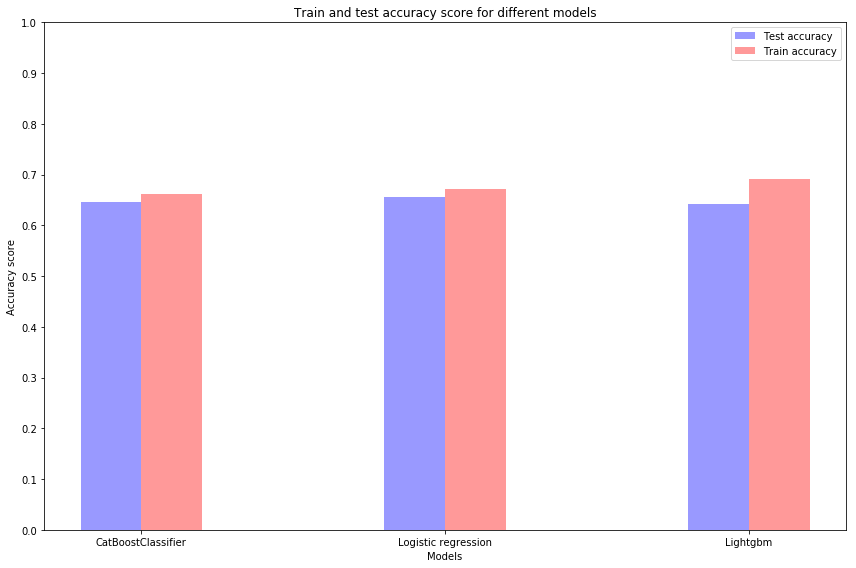

In [113]:
test_acc = (cat_test_acc, lg_test_acc, lgb_test_acc)
train_acc = (cat_train_acc, lg_train_acc, lgb_train_acc)
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(3)
bar_width = 0.2
opacity = 0.4
error_config = {'ecolor': '0.4'}

rects1 = ax.bar(index, test_acc, bar_width, alpha=opacity, color='b', error_kw=error_config, label='Test accuracy')
rects2 = ax.bar(index + bar_width, train_acc, bar_width, alpha=opacity, color='r', error_kw=error_config, label='Train accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy score')
ax.set_title('Train and test accuracy score for different models')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xticklabels(('CatBoostClassifier', 'Logistic regression', 'Lightgbm'))
ax.legend()

fig.tight_layout()
plt.show()

## Ensembling

In [118]:
def alg_ensemble(pred_list):
    result = np.zeros(pred_list.shape[1])
    for i in range(pred_list.shape[1]):
        ans = np.sum(pred_list[:, i]) / pred_list.shape[0]
        result[i] = 1 if ans >= 0.5 else 0
    return result
        

In [124]:
preds_test = []
preds_train = []
preds_test.append(cat.predict(X_test))
preds_train.append(cat.predict(X_train))
preds_test.append(lg_best_model.predict(X_test_enc))
preds_train.append(lg_best_model.predict(X_train_enc))
preds_test.append(lgb_best_model.predict(X_test_enc))
preds_train.append(lgb_best_model.predict(X_train_enc))
preds_test = np.array(preds_test)
preds_train = np.array(preds_train)

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [125]:
preds_test_ens = alg_ensemble(preds_test)
preds_train_ens = alg_ensemble(preds_train)
print('ensemble (test): {}'.format(accuracy_score(y_test, preds_test_ens)))
print('ensemble (train): {}'.format(accuracy_score(y_train, preds_train_ens)))

ensemble (test): 0.6443381180223285
ensemble (train): 0.6788969917958068
